# Generate some correlated Gaussians

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
def generateWithCorrelation(rho=0, N=10000):
    scalefactor=2
    if rho > 1 or rho < -1:
        print("rho must be with in -1 and 1")
        return [], []
    randomGaussX = np.random.randn(N)*scalefactor 
    randomGauss2 = np.random.randn(N)*scalefactor
    randomGaussY = [z*sqrt(1.0 - rho**2) + rho*x for x,z in zip(randomGaussX, randomGauss2)] 
    return randomGaussX, randomGaussY  
#scale factor to make sure correlation not coincidentally same as covariance  

In [3]:
def plotRandomGauss(data, size=6):
    plt.figure(figsize=(size,size))
    plt.scatter(data[0], data[1])
    plt.show()

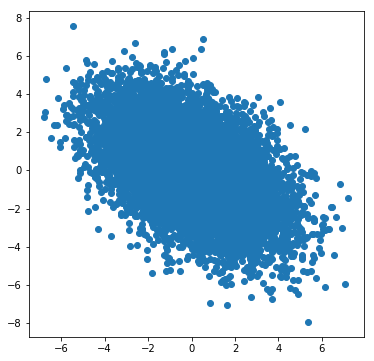

In [4]:
plotRandomGauss(generateWithCorrelation(-0.5, 10000))

In [5]:
def CovAndCorrCoeff(ListPair):
    sumx=0
    sumy=0
    sumxx=0
    sumyy=0
    sumxy=0
    N=0
    for x, y in zip(ListPair[0], ListPair[1]):
        sumx += x
        sumy += y
        sumxx += x**2
        sumyy += y**2
        sumxy += x*y
        N+=1
    meanx = sumx/N
    meany = sumy/N
    meanxx = sumxx/N
    meanyy = sumyy/N
    meanxy = sumxy/N
    
    Vx = meanxx - meanx**2
    sigmax = sqrt(Vx)
    Vy = meanyy - meany**2
    sigmay = sqrt(Vy)
    
    cov = meanxy - meanx*meany
    rho = cov/(sigmax*sigmay)
    
    return cov, rho

In [6]:
def GeneratePlotAndCalculate(rho=0, N=10000):
    data = generateWithCorrelation(rho, N)
    plotRandomGauss(data)
    cov, rho = CovAndCorrCoeff(data)
    print("Covariance = ", cov, ", correlation coefficient ", rho)

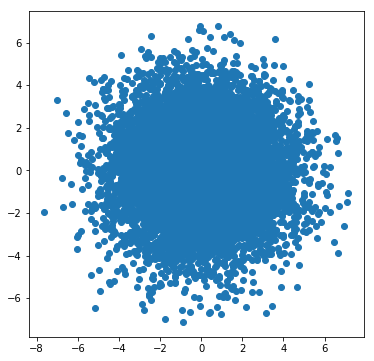

Covariance =  -0.017228176167 , correlation coefficient  -0.00437175292297


In [7]:
GeneratePlotAndCalculate(0)

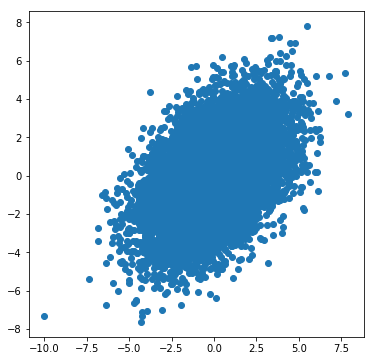

Covariance =  2.00265758483 , correlation coefficient  0.498461408318


In [8]:
GeneratePlotAndCalculate(0.5)

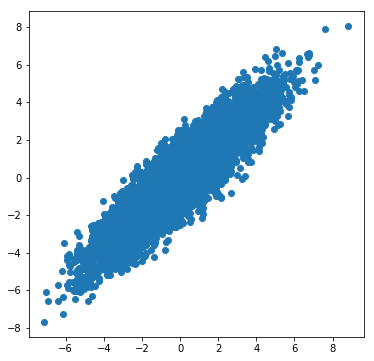

Covariance =  3.6596411173 , correlation coefficient  0.900974579172


In [9]:
GeneratePlotAndCalculate(0.9)

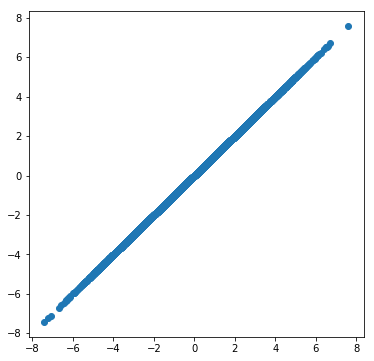

Covariance =  3.93331738619 , correlation coefficient  1.0


In [10]:
GeneratePlotAndCalculate(1)

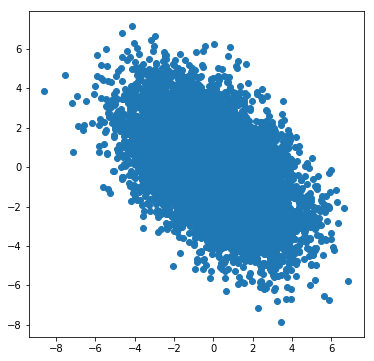

Covariance =  -1.97554428337 , correlation coefficient  -0.499382475916


In [11]:
GeneratePlotAndCalculate(-0.5)

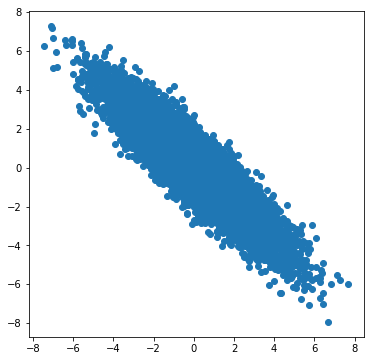

Covariance =  -3.7168137306 , correlation coefficient  -0.905339590032


In [12]:
GeneratePlotAndCalculate(-0.9)

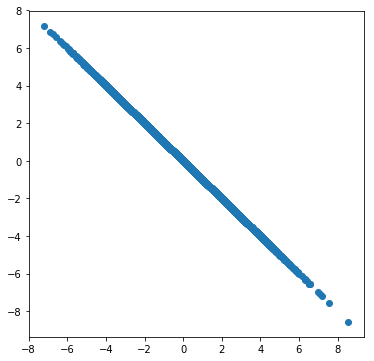

Covariance =  -4.09316308378 , correlation coefficient  -1.0


In [13]:
GeneratePlotAndCalculate(-1)